In [1]:
!pip install numpy xlrd pandas matplotlib seaborn sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=8a5449cc13c3f09811191c9a5c6e6c17a956f164472498746140a612140bb16f
  Stored in directory: /tmp/pip-ephem-wheel-cache-5ex6czb6/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [5]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [6]:
# %%timeit -n 1
# Load your data  -- start with CreditScoring.csv... then online retail
# df = pd.read_csv('./data/REPLACE_WITH_YOUR_FILE')
#  you can also pull from urls like this:   
df = pd.read_csv('https://raw.githubusercontent.com/fenago/pythonml/main/data/CleanCreditScoring.csv')

## Notes

This session covers data collection and some procedures of data preparation. 

**Commands, functions, and methods:** 

* `!wget` - Linux shell command for downloading data 
* `pd.read.csv()` - read csv files 
* `df.head()` - take a look of the dataframe 
* `df.head().T` - take a look of the transposed dataframe 
* `df.columns` - retrieve column names of a dataframe 
* `df.columns.str.lower()` - lowercase all the letters 
* `df.columns.str.replace(' ', '_')` - replace the space separator 
* `df.dtypes` - retrieve data types of all series 
* `df.index` - retrive indices of a dataframe
* `pd.to_numeric()` - convert a series values to numerical values. The `errors=coerce` argument allows making the transformation despite some encountered errors. 
* `df.fillna()` - replace NAs with some value 
* `(df.x == "yes").astype(int)` - convert x series of yes-no values to numerical values.
* `df['Weight'] = df['Weight'].astype(int)` - this takes a single column of data and converts the data type

In [7]:
len(df)

4446

In [8]:
df.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,8.176370,14.647979,10.986366,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,2.000000,36.000000,28.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,5.000000,48.000000,36.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,12.000000,60.000000,45.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


In [9]:
df.shape
#(rows, columns)

(4446, 27)

In [11]:
df.info()
# object usually means string
# look for data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   object 
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   object 
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   object 
 6   Records     4446 non-null   object 
 7   Job         4446 non-null   object 
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   int64  
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   int64  
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   object 
 17  timeR       4446 non-null   object 
 18  ageR        4446 non-null   object 
 19  expensesR   4446 non-null  

In [12]:
df.nunique()
#which are categorical and which are numeric

Status           2
Seniority       47
Home             6
Time            11
Age             50
Marital          5
Records          2
Job              4
Expenses        94
Income         364
Assets         173
Debt           182
Amount         285
Price         1418
Finrat        2861
Savings       2471
seniorityR       5
timeR            5
ageR             5
expensesR        5
incomeR          5
assetsR          5
debtR            5
amountR          5
priceR           5
finratR          5
savingsR         5
dtype: int64

In [13]:
df.corr()
# only works with numeric values
# type object will not appear in correlation

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
Seniority,1.000000,-0.021874,0.506089,0.125680,0.121224,0.124241,-0.019347,-0.007639,0.041122,-0.073392,0.093246
Time,-0.021874,1.000000,-0.051850,-0.001717,-0.029915,-0.083018,0.058267,0.430858,0.129677,0.468641,0.101653
Age,0.506089,-0.051850,1.000000,0.248137,0.147556,0.180986,-0.046188,0.029031,0.048685,-0.034514,0.062036
Expenses,0.125680,-0.001717,0.248137,1.000000,0.255005,0.018935,0.014771,0.049539,0.040728,0.024582,-0.038094
Income,0.121224,-0.029915,0.147556,0.255005,1.000000,0.219112,0.144697,0.190820,0.217789,-0.003407,0.717963
Assets,0.124241,-0.083018,0.180986,0.018935,0.219112,1.000000,0.191619,0.144284,0.194894,-0.025060,0.067001
Debt,-0.019347,0.058267,-0.046188,0.014771,0.144697,0.191619,1.000000,0.050902,0.043917,0.008609,0.004990
Amount,-0.007639,0.430858,0.029031,0.049539,0.190820,0.144284,0.050902,1.000000,0.725025,0.473842,-0.149323
Price,0.041122,0.129677,0.048685,0.040728,0.217789,0.194894,0.043917,0.725025,1.000000,-0.181348,-0.070361
Finrat,-0.073392,0.468641,-0.034514,0.024582,-0.003407,-0.025060,0.008609,0.473842,-0.181348,1.000000,-0.123180


In [14]:
# Basic Data Cleaning

#make column headings lowercase and replace spaces with '_'
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [ ]:
# MAKE SURE THAT YOU WRANGLE YOUR DATA.  THIS IS AN EXAMPLE OF THE TYPES OF THINGS THAT ARE NEEDED
# SKIP THIS CEL - IT IS ONLY TO REITERATE THE NEED TO CLEAN 
# For instance - in the CreditScoring dataset - there are numerous 99999999 that need to be replaced
# Obviously don't run this with your dataset
# for c in ['income', 'assets', 'debt']:
#    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
#df = df[df.status != 'unk']   # Also make sure to treat the target variable

In [15]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,...,timer,ager,expensesr,incomer,assetsr,debtr,amountr,pricer,finratr,savingsr
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time_(48,99]","age_(25,30]","exp_(60,80]","inc_(110,140]","asset_(-1,0]","debt_(-1,0]","am_(600,900]","priz_(0,1e+03]","finr_(90,100]","sav_(4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time_(48,99]","age_(50,99]","exp_(40,50]","inc_(110,140]","asset_(-1,0]","debt_(-1,0]","am_(900,1.1e+03]","priz_(1.5e+03,1.8e+03]","finr_(50,70]","sav_(4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time_(24,36]","age_(40,50]","exp_(80,1e+04]","inc_(190,1e+04]","asset_(0,3e+03]","debt_(-1,0]","am_(1.4e+03,1e+05]","priz_(1.8e+03,1e+05]","finr_(50,70]","sav_(0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time_(48,99]","age_(0,25]","exp_(60,80]","inc_(140,190]","asset_(0,3e+03]","debt_(-1,0]","am_(600,900]","priz_(1.3e+03,1.5e+03]","finr_(50,70]","sav_(6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time_(24,36]","age_(25,30]","exp_(40,50]","inc_(80,110]","asset_(-1,0]","debt_(-1,0]","am_(0,600]","priz_(0,1e+03]","finr_(0,50]","sav_(6,99]"


In [16]:
df.head().T
# df.sample(4).T --> sample of data, NOT first 4

,0,1,2,3,4
status,good,good,bad,good,good
seniority,9,17,10,0,0
home,rent,rent,owner,rent,rent
time,60,60,36,60,36
age,30,58,46,24,26
marital,married,widow,married,single,single
records,no_rec,no_rec,yes_rec,no_rec,no_rec
job,freelance,fixed,freelance,fixed,fixed
expenses,73,48,90,63,46
income,129,131,200,182,107


### Create Visuals so you can gain a business understanding of your data

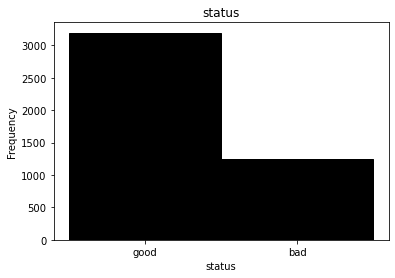

In [17]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
plt.figure(figsize=(6, 4))

sns.histplot(df.status, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('status')
plt.title('status')

plt.show()

## Notes
* (1) Check for NaN under a single DataFrame column:

* `df['your column name'].isnull().values.any()`

* (2) Count the NaN under a single DataFrame column:

`df['your column name'].isnull().sum()`

* (3) Check for NaN under an entire DataFrame:

`df.isnull().values.any()`

* (4) Count the NaN under an entire DataFrame:

`df.isnull().sum().sum()`

In [18]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income        0
assets        0
debt          0
amount        0
price         0
finrat        0
savings       0
seniorityr    0
timer         0
ager          0
expensesr     0
incomer       0
assetsr       0
debtr         0
amountr       0
pricer        0
finratr       0
savingsr      0
dtype: int64

In [19]:
# Check for the percentage of missing values
df.isnull().sum() / df.shape[0] * 100

status        0.0
seniority     0.0
home          0.0
time          0.0
age           0.0
marital       0.0
records       0.0
job           0.0
expenses      0.0
income        0.0
assets        0.0
debt          0.0
amount        0.0
price         0.0
finrat        0.0
savings       0.0
seniorityr    0.0
timer         0.0
ager          0.0
expensesr     0.0
incomer       0.0
assetsr       0.0
debtr         0.0
amountr       0.0
pricer        0.0
finratr       0.0
savingsr      0.0
dtype: float64

In [20]:
#check Value Counts
# df."REPLACE WITH FIELD NAME".value_counts()
df.status.value_counts()

good    3197
bad     1249
Name: status, dtype: int64

In [ ]:
df.head()

In [ ]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
# df = df.drop(['x5_latitude', 'x6_longitude', 'x1_transaction_date'], axis=1)
# df

In [ ]:
# Split Data
# i.e.:  address = London, UK
# df[['city', 'country']] = df['address'].str.split(',', expand=True)

In [ ]:
# Change any Data Types
#Replace Data Types to Integer
# df["Customer Number"] = df['Customer Number'].astype('int')
#Replace Data Types to String
# df["Customer Number"] = df['Customer Number'].astype('str')
#Replace Data Types to Boolean
# df["IsPurchased"] = df['IsPurchased'].astype('bool')
#Replace Data Types to Float
# df["Total Spend"] = df['Total Spend'].astype('float')
#Replace Data Types to Datetime with format= '%Y%m%d'
# df['Dates'] = pd.to_datetime(df['Dates'], format='%Y%m%d')

## Univariate Analysis

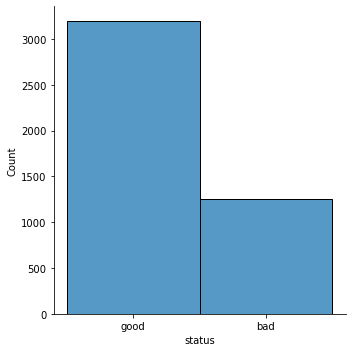

In [23]:
## STICK TO CATEGORICAL COLUMNS INITIALLY
#plot the histogram to see the distribution of the point data.
sns.displot(data=df, x="status")

<AxesSubplot:xlabel='status', ylabel='count'>

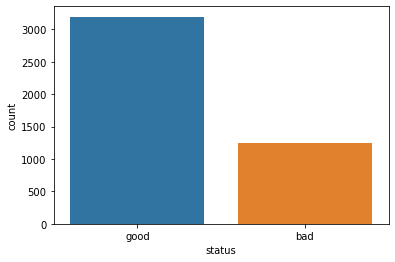

In [24]:
sns.countplot(x="status", data=df)

In [25]:
df['status'].value_counts()

good    3197
bad     1249
Name: status, dtype: int64

In [28]:
#measure its skewness and kurtosis
df['status'].agg(['skew', 'kurtosis']).transpose()

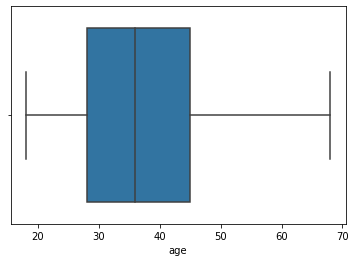

In [32]:
#check for outliers
ax = sns.boxplot(x=df["age"])

![image info](https://miro.medium.com/max/1400/1*_aN1iaiVUTdoyPbyj-kVjA.jpeg)

## Bivariate Analysis

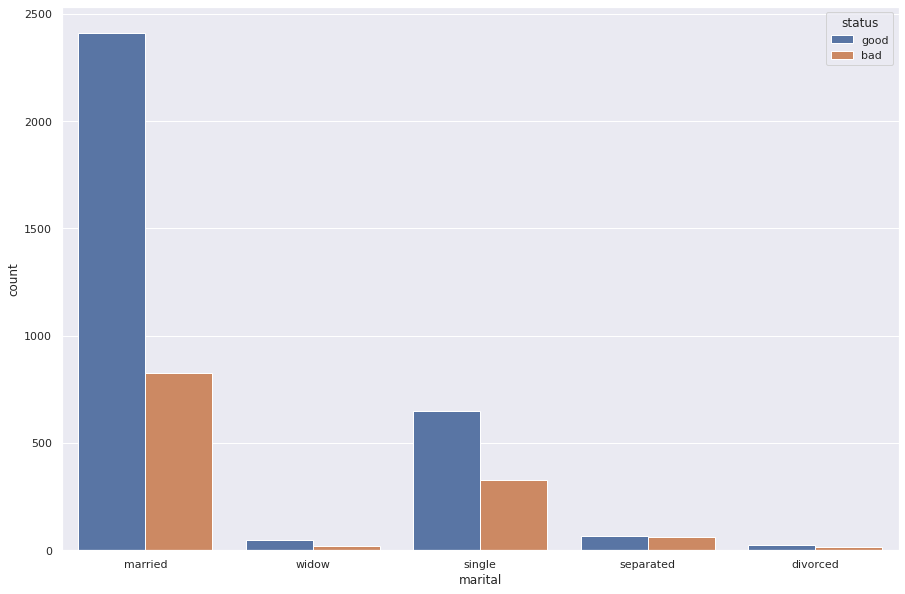

In [36]:
# Pick 2 variables to compare and replace SEX and DEFAULT WITH THE TWO VARIABLES
# Stick with Categorical variables for now
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.countplot(x='marital', hue='status', data=df)
# edu.set_xticklabels(['Male','Female'])
plt.show()

In [37]:
# Evaluate the Cross Tab
pd.crosstab(df.SEX,df.DEFAULT,normalize='index',margins=True)

AttributeError: 'DataFrame' object has no attribute 'SEX'

## Correlation

<AxesSubplot:>

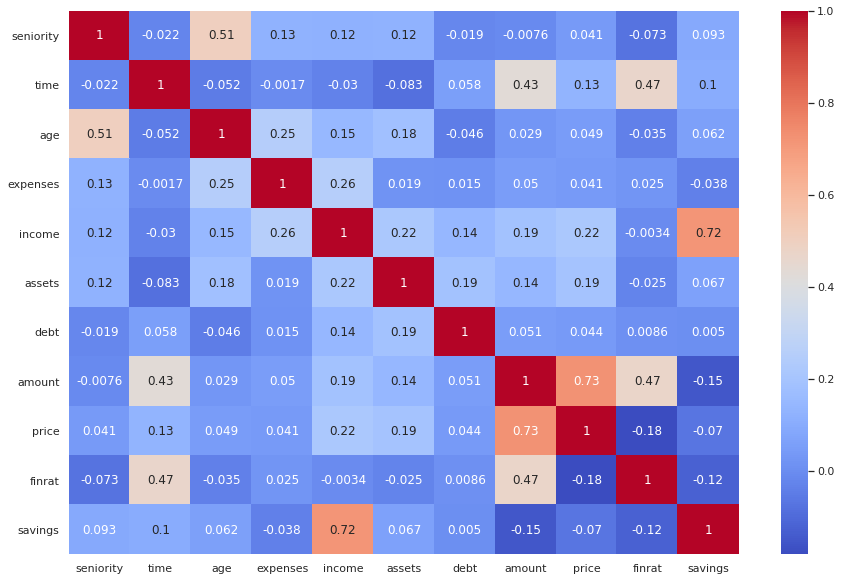

In [38]:
# Pearson Correlation
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')
#look for dark red, and dark blue
#i.e. savings, income

In [ ]:
# Spearman Correlation
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

In [ ]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

In [ ]:
# To get the Correlation between your variable of interest and the rest of the variables
# - replace "DEFAULT" with your variable of interest.
df.drop("DEFAULT", axis=1).apply(lambda x: x.corr(df.DEFAULT,method='spearman'))